# How to code simple linear regression

First, let's build a linear regression model using the *statsmodels* package. This package builds several statistical models and provides a nice output summary of the linear regression model.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

#We will build a statistical linear regression model first
#If we would be using linear regression just for prediction, we use sklearn

#Make the data
#y are box offce revenues, x: advertising. All variables are expressed in 000s
#Linear regression accepts Pandas DataFrame 
d = {"y":[23,12,36,27,45],"x":[29,49,89,110,210]}
data = pd.DataFrame(data = d)

#We seperate the predictor and the response
#Linear regression only accepts a dataframe as input for the predictors
#so we use [[]] to select x from the data
#[] does also work : data['x']
x = data[['x']]
y = data['y']

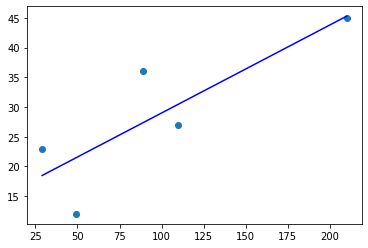

In [11]:
#Make a scatterplot of the data and add the regression line: y_i =14.179+0.1481x_i
plt.scatter(x,y)
plt.plot(x,14.179 + 0.1481*x, 'b-')
plt.show()

In [14]:
#The statsmodels package does not add an intercept by default
#First,we need to add a constant

x = sm.add_constant(x)

#Fit an OLS model
linreg = sm.OLS(y,x).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     6.677
Date:                Sun, 05 Sep 2021   Prob (F-statistic):             0.0815
Time:                        18:18:04   Log-Likelihood:                -16.270
No. Observations:                   5   AIC:                             36.54
Df Residuals:                       3   BIC:                             35.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1786      6.651      2.132      0.1

C:\Users\goodsma\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\goodsma\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


If we would calculate our estimates on another set of observations, we would get another regression line. Hence, our coefficient estimates will also vary with different sets of observations. This is exactly what the standard error (std err) is telling us: ‘How much will the coefficient estimates vary when using different samples?’

The Df Model represents the degrees of freedom of the model. In this case, we have 1 degree of freedom, since we have 1 predictor. The degrees of freedom of the residuals (Df Residuals) is equal to 3, since we have 5 observations but have to estimate the intercept and the slope (so 5-2=3).

The R^2 is a measure of goodness-of-fit and shows us the explanatory power of our model. The R^2 indicates how much variance in the response variable (Y) is explained by the regressed model.

The  is a number between 0 and 1. The closer to 0 (1) means that the model does not explain (explains) a lot of the variability in the response. A low value for the might be an indication that the relationship is not linear.